In [36]:
import pandas as pd
import requests
from astroquery.gaia import Gaia
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import ssl
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv("data/planetary_system.csv" , on_bad_lines='skip')

In [38]:
dtypes_df = pd.DataFrame(df.dtypes).reset_index()
dtypes_df.columns = ['Column', 'DataType']

pd.set_option('display.max_rows', None)  

print(dtypes_df)

pd.reset_option('display.max_rows')

             Column DataType
0           pl_name   object
1          hostname   object
2      default_flag    int64
3           sy_snum    int64
4           sy_pnum    int64
5   discoverymethod   object
6         disc_year    int64
7     disc_facility   object
8           soltype   object
9   pl_controv_flag    int64
10       pl_refname   object
11        pl_orbper  float64
12    pl_orbpererr1  float64
13    pl_orbpererr2  float64
14     pl_orbperlim  float64
15       pl_orbsmax  float64
16   pl_orbsmaxerr1  float64
17   pl_orbsmaxerr2  float64
18    pl_orbsmaxlim  float64
19          pl_rade  float64
20      pl_radeerr1  float64
21      pl_radeerr2  float64
22       pl_radelim  float64
23          pl_radj  float64
24      pl_radjerr1  float64
25      pl_radjerr2  float64
26       pl_radjlim  float64
27        pl_bmasse  float64
28    pl_bmasseerr1  float64
29    pl_bmasseerr2  float64
30     pl_bmasselim  float64
31        pl_bmassj  float64
32    pl_bmassjerr1  float64
33    pl_bmass

In [39]:
total_exoplanetas = df['pl_name'].nunique()
print(f"Número total de exoplanetas: {total_exoplanetas}")

Número total de exoplanetas: 5759


In [40]:
nombre_exoplaneta = 'Kepler-37 b' 

In [41]:
exoplaneta = df[df['pl_name'] == nombre_exoplaneta]
exoplaneta

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
23930,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Kepler Project Candidate (q1_q17_dr25_sup_koi),0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2018-09-25,2018-08-16,2018-09-25
23931,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Published Confirmed,0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2018-04-25,2015-08,2015-05-21
23932,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Published Confirmed,0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2018-04-25,2014-02,2016-10-27
23933,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Published Confirmed,0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2018-09-04,2018-10,2018-09-06
23934,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Published Confirmed,0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2018-04-25,2013-02,2014-05-14
23935,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Published Confirmed,0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2019-04-16,2019-03,2019-04-18
23936,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Kepler Project Candidate (q1_q8_koi),0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2013-10-28,2014-01-08,2013-10-28
23937,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Kepler Project Candidate (q1_q12_koi),0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2014-11-18,2014-12-04,2014-11-18
23938,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Kepler Project Candidate (q1_q16_koi),0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2014-11-21,2014-12-18,2014-11-21
23939,Kepler-37 b,Kepler-37,0,1,4,Transit,2013,Kepler,Published Confirmed,0,...,-0.004,7.942,0.013,-0.013,9.54988,0.000258,-0.000258,2024-02-21,2024-01,2024-02-21


In [42]:
def buscar_exoplaneta(df, nombre_exoplaneta):
    exoplaneta = df[df['pl_name'] == nombre_exoplaneta]
    
    if not exoplaneta.empty:
        exoplaneta_confirmado = exoplaneta[exoplaneta['soltype'].str.contains('Published Confirmed', na=False)]
        
        if not exoplaneta_confirmado.empty:
            ultimo_exoplaneta = exoplaneta_confirmado.sort_values(by='rowupdate', ascending=False).iloc[0]
            sistema_planetario = exoplaneta['hostname'].nunique()
            return ultimo_exoplaneta, sistema_planetario
    return None, None

In [43]:
exoplaneta_info, sistema_planetario = buscar_exoplaneta(df, nombre_exoplaneta)

if exoplaneta_info is not None:
    print(exoplaneta_info)
    print(f'El exoplaneta {nombre_exoplaneta} pertenece al sistema planetario: {sistema_planetario}')
else:
    print(f'No se encontró el exoplaneta {nombre_exoplaneta}.')

pl_name           Kepler-37 b
hostname            Kepler-37
default_flag                0
sy_snum                     1
sy_pnum                     4
                     ...     
sy_gaiamagerr1       0.000258
sy_gaiamagerr2      -0.000258
rowupdate          2024-02-21
pl_pubdate            2024-01
releasedate        2024-02-21
Name: 23939, Length: 92, dtype: object
El exoplaneta Kepler-37 b pertenece al sistema planetario: 1


##GAIA SE ITNEGRA CON GAIA.LAUNCH()


In [44]:

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

def obtener_datos_gaia(ra, dec, rango=0.1):
    query = f"""
    SELECT *
    FROM gaiaedr3.gaia_source
    WHERE CONTAINS(
        POINT('ICRS', ra, dec),
        CIRCLE('ICRS', {ra}, {dec}, {rango})
    ) = 1
    """
    job = Gaia.launch_job(query)
    return job.get_results()

In [45]:
if not exoplaneta.empty:
    ra = exoplaneta['ra'].values[0] 
    dec = exoplaneta['dec'].values[0]
    distancia = exoplaneta['sy_dist'].values[0]  

    print(f"Coordenadas del exoplaneta {nombre_exoplaneta}:")
    print(f"RA: {ra} grados, Dec: {dec} grados, Distancia: {distancia} parsecs")
else:
    print("Exoplaneta no encontrado.")  

Coordenadas del exoplaneta Kepler-37 b:
RA: 284.0592503 grados, Dec: 44.5183733 grados, Distancia: 63.9207 parsecs


In [46]:
exoplaneta_info['dec']

np.float64(44.5183733)

In [47]:
ssl._create_default_https_context = ssl._create_unverified_context
gaia_data = obtener_datos_gaia(ra,dec)

gaia_data

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,deg,deg,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64
1636042515805110273,Gaia EDR3 2106626173871134464,2106626173871134464,1140524751,2016.0,284.08118684473953,0.22208916,44.42115648567398,0.26639158,0.036372358397143964,0.25616074,0.14199036,2.2585561,-1.2468960860127756,0.27314135,-1.8831691219650841,0.31088313,-0.19602877,-0.0927456,-0.12029337,0.13284923,0.10972043,0.122250214,-0.28722984,-0.03822033,0.01268579,-0.10835513,359,0,358,1,-0.6239682,348.6428,0.0,2.142367e-15,95,False,--,1.4567369,0.070616186,-0.031811118,-0.018449808,0.070840515,-0.20866872,-0.05556553,41,26,0.45011038,44,20,1,0.01593087,60.03114,0,0,0.97563636,0.21605942,0.12900715,0.106913894,0.11373827,-98.80452,59.49669,-2.9259782,30.05759,False,359,259.18360467171846,0.81312174,318.75128,19.653349,33,119.53414788291032,6.581508,18.16212,20.144812,32,194.74872908681667,6.741346,28.888702,19.024208,0,2,0,0,0,1.2125878,1.1206036,0.4914627,0.62914085,--,--,0,--,--,--,74.34767373250504,17.794430980987247,295.9430349679888,66.59673879805561
1636042515805110273,Gaia EDR3 2106626242590626176,2106626242590626176,170288735,2016.0,284.11197338318794,0.32959557,44.42869401441631,0.41902947,0.1630752018

In [48]:
def graficar_exoplaneta(exoplaneta, gaia_data):
    plt.figure(figsize=(10, 10))
    plt.scatter(gaia_data['ra'], gaia_data['dec'], color='blue', s=1, label='Estrellas de Gaia')
    plt.scatter(exoplaneta['ra'], exoplaneta['dec'], color='red', label='Exoplaneta')
    plt.title(f'Ubicación de {exoplaneta["pl_name"]}')
    plt.xlabel('RA (degrees)')
    plt.ylabel('Dec (degrees)')
    plt.legend()
    plt.grid()
    plt.show()


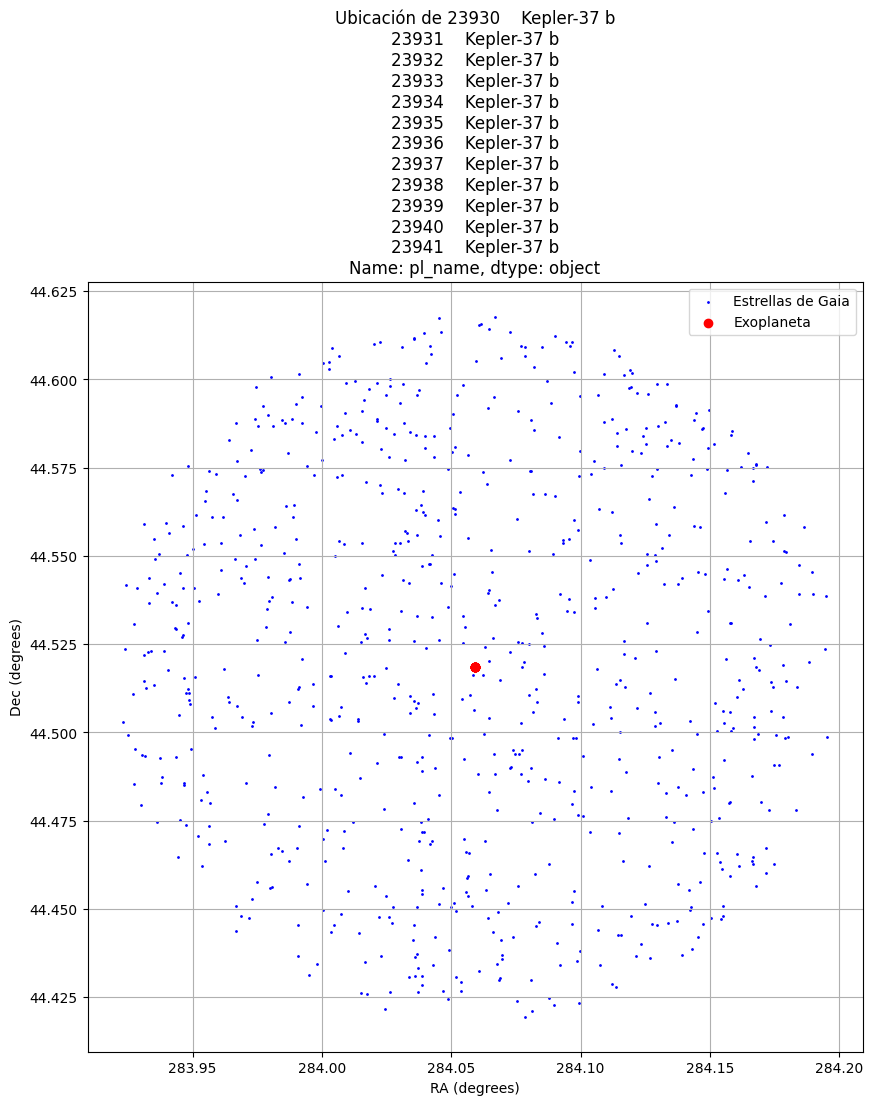

In [49]:
graficar_exoplaneta(exoplaneta,gaia_data)